
# Analise Dimensional

Uma parte importante da validação de qualquer modelo, é a chamada análise dimensional. Devido à sua natureza de taxa de variação, ODEs de primeira ordem devem ter unidade de velocidade, ou seja $Grandeza / tempo$, isto é, assumindo que a variável independente seja o tempo.



Agora precisamos de um modelo para analisar.

**Exemplo: Modelo Predador-Presa**

$$\frac{dx}{dt}= r_1 x(1-\frac{x}{K}) - A\frac{xy}{D+x}$$

$$\frac{dy}{dt} = r_2 y (1-\frac{y}{qx})$$

onde $x(t)$ é a população da presa, $y(t)$ a do predador, e $r_i$, $K$, $A$, $D$ e $q$ são constantes. Agora vamos tentar entender as unidades de nosso modelo. Vamos assumir a grandeza Massa (M) para nossas populações e T para o tempo, naturalmente. Em seguida podemos substituir cada símbolo nas equações por sua unidade:



In [1]:
%display typeset

In [2]:
var('M T x y A D K r1')
f(x) = r1*x*(1-x/K)-A*(x*y/(D+x))
f(x)

-r1*x*(x/K - 1) - A*x*y/(D + x)

Agora substituímos as variáveis por suas dimensões:

In [3]:
# r1 é uma taxa, logo 1/T
# Para poder ser somado a X, D tem que ter a mesma unidade
# Capacidade de suporte (K) é também unidade de massa
fd = expand(f(x)).substitute(x=M,K=M,D=M,y=M,r1=1/T)
fd

-1/2*A*M

Agora resolvemos para A e encontramos a dimensão de $A$ que é $1/T$. Isto é como deve ser pois o lado esquerdo da equação, $\frac{dx}{dt}$ tem dimensão $M/T$ 

In [4]:
solve(-A*M/2-M/T,A)

[A == -2/T]

In [5]:
solve(r1*M*1-M/T,r1)

[r1 == (1/T)]


## Adimensionalizando um Sistema de Equações

Uma ferramenta muito útil na simplificação de modelos é a adimensionalização. Neste processo, propomos substituições de variáveis e outras manipulações algébricas com a intenção de tornar adimensionais as variáveis do modelo e neste processo, frequentemente reduzimos também o número de parâmetros no modelo.

Vamos começar com um exemplo simples com uma única equação diferencial.
### Crescimento Logístico

O modelo de crescimento logístico é um modelo de crescimento auto-limitado, onde a taxa de crescimento depende da densidade. Seja $r \gt 0$ a taxa de crescimento intrínseco em unidades $T^{-1}$ e $K \gt 0$ a capacidade de suporte, com as mesmas unidades de N. O modelo Logístico fica então:

$$\frac{dN}{dt}=r N \left(1-\frac{N}{K}\right)$$


In [6]:
var('N r K t')
N = function('N')(t)
dndt = diff(N,t) == r*N*(1-N/K)
dndt

diff(N(t), t) == -r*(N(t)/K - 1)*N(t)

Dividindo ambos os lados da equação por K, obtemos:

In [7]:
dndt/K

diff(N(t), t)/K == -r*(N(t)/K - 1)*N(t)/K

Podemos ver que N sempre aparece na forma $N/K$. Podemos simplificar o modelo e reduzir o número de parâmetros tratando esta quantidade com uma nova variável: $$y(t)=N(t)/K$$

In [8]:
var('y')
y = function('y')(t)
dydt = diff(y,t) == r*y*(1-y)
dydt

diff(y(t), t) == -r*(y(t) - 1)*y(t)



Note que $y$, por definição, é adimensional. agora resta apenas uma quantidade dimensional no modelo: $r (T^{-1})$. Podemos então introduzir uma nova variável $s=r t$. Chegamos então a $$\frac{dy}{ds}=y(1-y)$$

Agora temos um modelo completamente adimensional e sem nenhum parâmetro livre. Como podemos obter a solução de N(t), a partir da solução Y(s)?

Simples: $N(t) = K y(s) = K y(rt)$
### Produção-Decaimento

$$\frac{dx}{dt}= I - \gamma x$$

Neste caso primeiro rearranjamos a equação como $$\frac{dx}{dt}=\gamma \left(\frac{I}{\gamma}-x \right)$$

Agora fica evidente que $I/\gamma$ tem a mesma unidade de $x$. Agora podemos definir as seguintes variáveis adimensionais: $x^*=\frac{x}{I/\gamma}$, e $t^*=\frac{t}{1/\gamma}$.

se substituirmos $x$ e $t$ por estas novas variáveis obtemos:

$$\frac{d(I/\gamma)x^*}{d(1/\gamma)t^*}=\gamma \left(\frac{I}{\gamma}-\frac{I}{\gamma}x^* \right)$$

Como $I/\gamma$ é uma constante que aparece como um fator comum a todos os termos, desde que $\gamma$ e $I$ sejam diferentes de 0, podemos cancelá-los em ambos os lados da equação. Agora basta multiplicar ambos os lados por $1/\gamma$ e obtemos:

$$\frac{dx^*}{dt^*}=1-x^*$$



## Combinando Análise dimensional com Adimensionalização
### Modelo de Dimerização

Considere a seguinte reação química:

$$A+A \leftrightarrows^{k_2}_{k_1} C$$

$$\frac{dA}{dt}=-2 k_1 A^2 + 2 k_2 C$$

$$\frac{dC}{dt}=k_1 A^2 -k_2 C$$

**1º passo: Análise dimensional**

Vamos examinar as dimensões presentes neste sistema. a partir de agora vamos usar $[\,]$ para denotar "a dimensão de" :

A concentração de uma molécula em solução representa número de moléculas por volume, logo: $[A_0]=L^{-3}$,  $[A]=L^{-3}$,  $[C]=L^{-3}$. 

A constante $k_2$ são taxas, e como já vimos, têm dimensão $T^{-1}$. Por fim, a variável tempo: $[t]=T$. 

Em uma equação bem construida cada termo deve possuir as mesmas dimensões, uma vez que não podemos comparar "bananas" com "laranjas" e muito menos somá-las. Portanto para a primeira equação diferencial temos:

$$[dA/dt] = [A]/[t]= L^{-3} T^{-1}$$

Para o termo $k_1A^2$ temos:

$$[k_1A^2] = [k_1][A]^2 = [k_1] L^{-6}$$

como, pela equação anterior,

$$ [k_1] L^{-6} =  L^{-3} T^{-1}$$

temos que:

$$[k_1] = L^3 T^{-1}$$

**2º passo: Adimensionalização**

Vamos começar pela substituição da variável $t$ por uma nova variável independente adimensional. Vamos fazer isso por meio da divisão por uma combinação adequada de parâmetros.

$$t^*=\frac{t}{1/k_2} = k_2 t$$

Outra combinação de parâmetros poderia ter sido utilizada, como por exemplo, $(A_0k_1)^{-1}$. 

Para as concentrações, um boa escolha para concentrações adimensionais seria: $$a^*=\frac{A}{A_0}$$ e $$c^*=\frac{C}{C_0}$$

**3º passo: Re-escrever as equações em termos das novas variáveis**

As variáveis dimensionais originais, $C$, $A$ e $t$ se relaccionam com suas contrapartidas adimensionais da seguinte forma: $$C=C_0 c^*,$$ $$A=A_0 a^*, $$ $$t=\frac{t^*}{k_2}.$$

As condições iniciais podem ser reescritas como:

em $t^*=0$, $a^*=1$ e $c^*=0$.

Substituindo as formas adimensionais no modelo e simplificando, obtemos:

$$k_2 A_0\frac{da^*}{dt^*} = -2 k_1 A_0^2(a^*)^2 + 2k_2A_0c^*$$

Como já vimos, é melhor simplificar as equações, reduzindo um dos coeficientes a 1. Podemos conseguir isso dividindo ambos os lados da equação acima por $k_2 A_0$:

$$\frac{da^*}{dt^*}=-2\phi (a^*)^2 + 2c^*,$$

agora temos um novo parâmetro $\phi =\frac{k_1 A_0}{k_2}$

Substituindo na equação de $C$ obtemos:

$$\frac{dc^*}{dt^*}=\phi(a^*)^2 - c^*$$

deixando os $*$ de fora, nossas equações ficam:

$$\frac{da}{dt}= -2\phi a^2 + 2c,\,\,a(0)=1,$$

$$\frac{dc}{dt}= \phi a^2 -c, \,\,\, c(0)=0$$

Neste novo modelo, o único parâmetro $\phi$ é adimensional:

$$[\phi] = \frac{[k_1][A_0]}{k_2} = \frac{L^3 T^{-1}\cdot L^{-3}}{T^{-1}}=L^0 T^0$$
**4o passo: Interpretando os parâmetros adimensionais**


Nem sempre os parâmetros adimensionais são apenas um preço a pagar, em termos de interpretabilidade, por equações mais simples.  Também podem nos dar interpretações próprias que nos ajudem a interpretar a dinâmica do sistema. Vamos tentar interpretar $\phi$.


No equilíbrio, $K_1 A^2 -k_2C = 0$, logo,
$$\frac{k_1 A}{k_2}=\frac{C_{eq}}{A_{eq}}$$
Vemos que $\phi$ é a razão das duas concentrações no equilíbrio.


In [1]:
def plot_sol(sol):
    a=list_plot([(i[0],i[1][0]) for i in sol],color='red', plotjoined=True, legend_label='a', alpha=.8)
    c=list_plot([(i[0],i[1][1]) for i in sol],color='blue', plotjoined=True, legend_label='c', alpha=.8, axes_labels=["t","y"], gridlines=True)
    r = list_plot([(i[0],i[1][1]/(i[1][0])^2) for i in sol],color='green', plotjoined=True, legend_label='c/a', alpha=.8, axes_labels=["t","y"], gridlines=True)
    a.legend()
    c.legend()
    r.legend()
    show(c+a+r)

In [8]:
def fun(t,y):
    a,c = y
    phi = 1.8
    return [-2*phi*a^2 + 2*c,
            phi*a^2 -c]

In [9]:
T = ode_solver()
T.algorithm='rk8pd'
T.function = fun
y0=[1,0]
T.ode_solve(t_span=[0,10],y_0=y0, num_points=100)

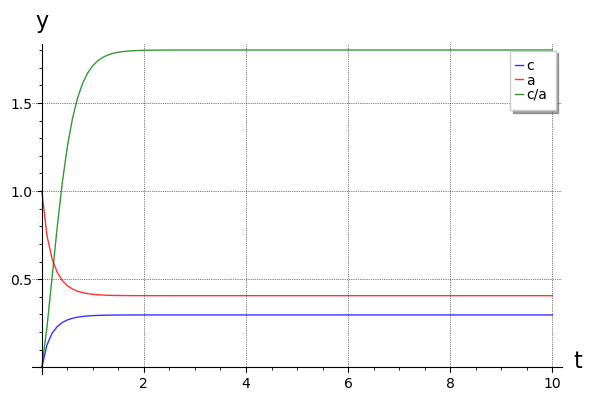

In [10]:
plot_sol(T.solution)

In [11]:
T.solution[-1][1][1]/T.solution[-1][1][0]^2

1.7999999999999998